# Covid-19 status in Madrid by Zones 

In [1]:
import numpy as np
from utils.utils import loadData, comparePlaces, plotPlaces
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Load data from the official source

In [ ]:
!wget https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv --no-check-certificat -O datasets/covid19_tia_muni_y_distritos.csv

In [3]:
df = loadData()

## List of locations to observe

In [4]:
madrid_places = df[df['municipio_distrito_clean'].str.startswith('Madrid')]['municipio_distrito_clean'].unique()
loc_places = np.array(['Getafe','Leganés','Fuenlabrada','Alcorcón','Móstoles','Parla','Alcalá de Henares','Torrejón de Ardoz'])
places = np.concatenate([madrid_places, loc_places])

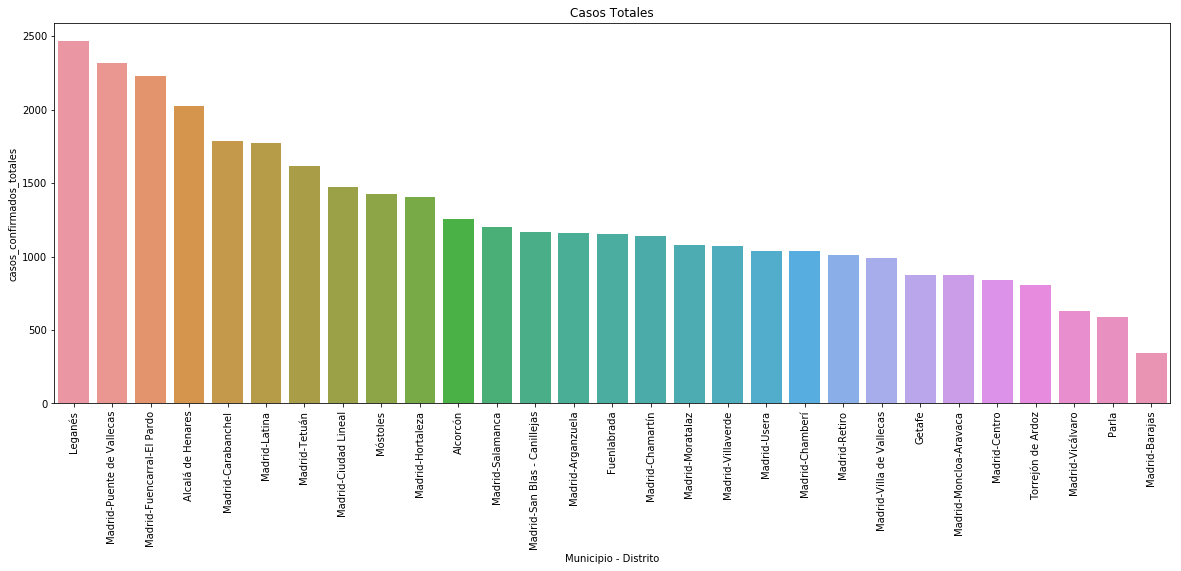

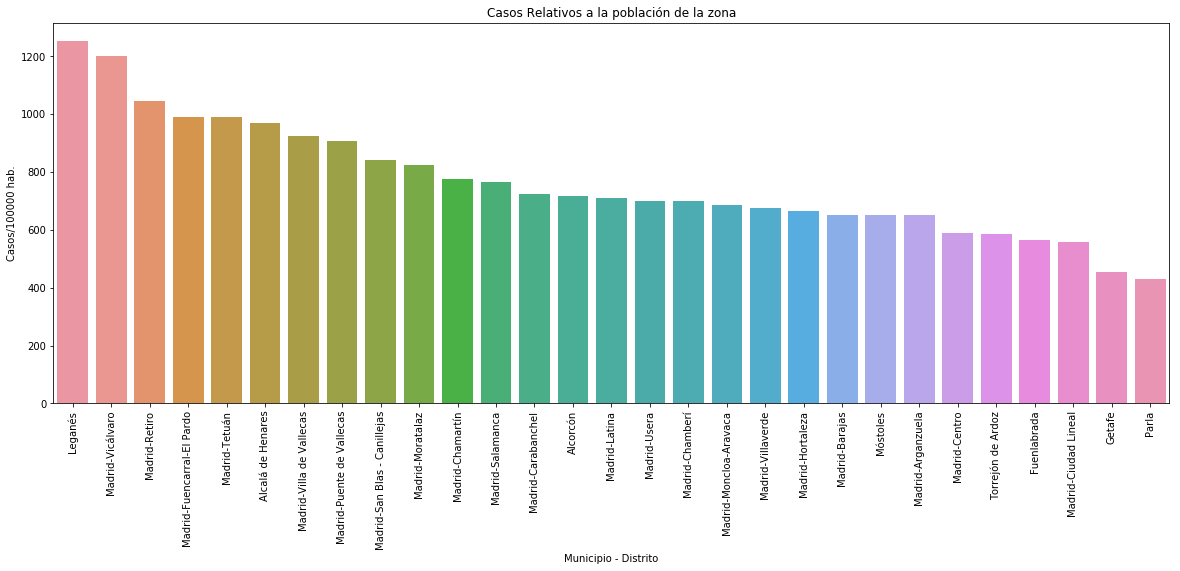

In [5]:
comparePlaces(df,places)

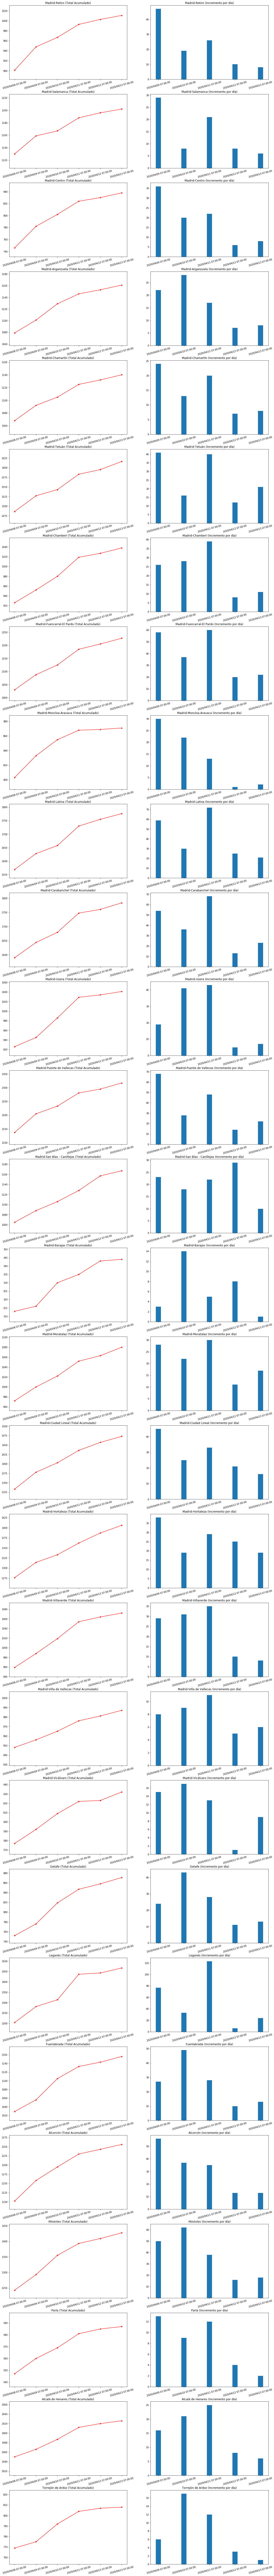

In [6]:
plotPlaces(df,places)

#  End of analysis!